### Importing Libraries

In this notebook, we have imported the following libraries:

- **pandas**: A powerful library for data manipulation and analysis.
- **sklearn**: A machine learning library that provides simple and efficient tools for data mining and analysis.
- **matplotlib.pyplot**: A plotting library used for creating static, interactive, and animated visualizations in Python.

These libraries are essential for handling data, building machine learning models, and visualizing results.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Loading the Dataset

In this notebook, we have created a sample dataset containing two features: **Annual Income** and **Spending Score**. This dataset simulates customer data, where:

- **Annual Income** Annual income of the customer in thousands.
- **Spending Score**  A score assigned based on customer behavior, from 1 (low) to 100 (high).

The dataset includes 44 entries, with some outliers added to simulate real-world scenarios. The data is stored in a pandas DataFrame named `df`, which allows for easy manipulation and analysis.

In [5]:
# Create a sample dataset with customer annual income and spending score
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


###  Preprocessing  the data
Clustering algorithms are sensitive to the scale of the features, so it’s essential to normalize the data. We’ll use StandardScaler to scale the features.

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
df_scaled.head()

,AnnualIncome,SpendingScore
0,-0.869761,-0.135877
1,-0.838899,-0.033387
2,-0.808036,0.069103
3,-0.777174,0.171594
4,-0.746311,0.274084


### Implementing k-means clustering
Now it’s time to implement the k-means clustering algorithm. First, we’ll initialize the algorithm with a predefined number of clusters (k), fit it to the data, and then assign each data point to a cluster.

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=47)

kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Display the first few rows with cluster assignments
df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39,0
1,15.5,42,0
2,16.0,45,0
3,16.5,48,0
4,17.0,51,0


k: The number of clusters. You can start with an arbitrary value of k = 3 and later evaluate the performance to choose the best number of clusters.

kmeans.labels_: The labels assigned to each data point, indicating the cluster they belong to.

### Visualizing the clusters

Now that we’ve clustered the data, let’s visualize the clusters using a scatterplot. We’ll color the data points based on their assigned cluster

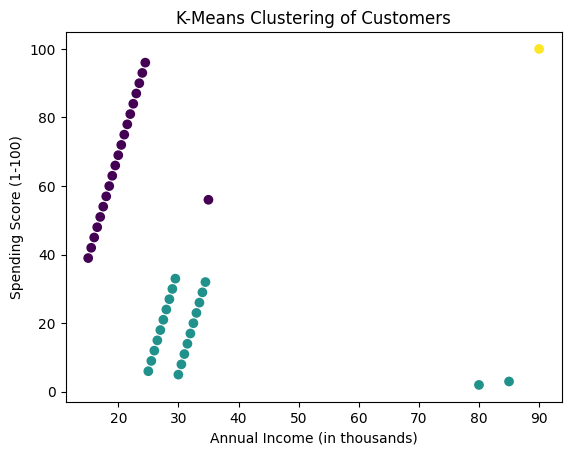

In [10]:
# Plot the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Finding the optimal number of clusters
 One way to determine the optimal number of clusters (k) is by using the elbow method, which involves plotting the *within-cluster sum of squares* (WCSS) against the number of clusters

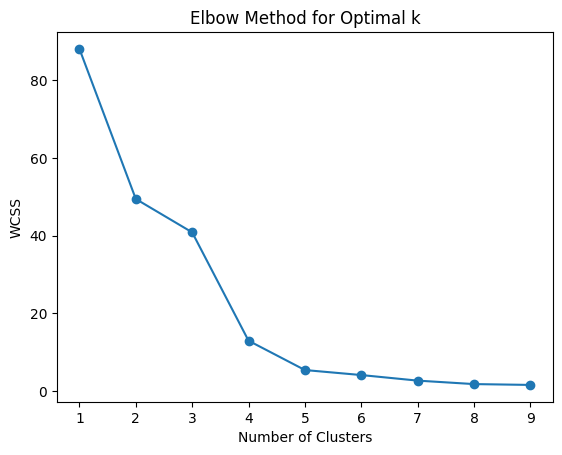

In [12]:
wcss = []
ranged = range(1,10)
for i in ranged:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the Elbow
plt.plot(ranged, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method helps determine the optimal k by identifying the point where the WCSS stops decreasing significantly, forming an "elbow" in the graph.